# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [101]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [102]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [103]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

Pros of the pie chart graph:
- It shows the relative proportions via percentage labels on each part of the whole.
- There is a concise number of slices making the graph easy to interpret. 
- The size of each slice seems accurate to the percentages given to each one on the graph making it visually understandable.
- The existance of a legend is good to have as it labels and explains what each of the slices represents.
- Each slice has distinct colors to differentiate each category.

Cons of the pie chart graph:
- The title doesn't clearly describe what the pie chart is showing. I understand they are survey results however shouldn't it convey what the survey was about or what the question was?
- The percentages in the darker colored slices can be harder to read with the black font.

I think the choice of using a pie chart as a format is wrong as the choices we are graphing are feelings or intensities. I think a better alternative would be using a bar chart to clearly communicate how many respondents fall into each category. A pie chart would be better used with more distinct categories like yes and no or red, blue, and green. The color scheme is fine as each slice has distinct colors to differentiate each category however the black font for each slice makes the percentages in darker colors harder to read. The legend is fine as is clearly labels each category as well as the color it is associated with. The title is okay but needed more in my opinion as it clearly does not describe what the chart is depicting other than survey results. I think the reader would like to understand what the original question or subject was for the the graph. If I were to draw it differently, I would use a bar chart with the appropriate title and labels to show how many respondants for each category and the subject they were responding to. 

# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [104]:
num_customers = 100
np.random.seed(0)

In [105]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [106]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [107]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [108]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [109]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [110]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [111]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [112]:
df_bank.loc[2, "AccountID"] = np.nan

In [113]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [114]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [115]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

In [116]:
# Look at the first few rows of the data
print("First few rows of the data:")
print(df_bank_loaded.head())
print("\n")

# Use the describe method to get a summary of the data
print("Summary of the data using describe():")
print(df_bank_loaded.describe())
print("\n")

# Use the info method to get a summary of the data
print("Summary of the data using info():")
print(df_bank_loaded.info())

First few rows of the data:
   CustomerID   BirthDate          SSN  AccountID AccountOpened AccountType
0         0.0        1980  530-47-1866        4.0    1959-12-06    checking
1         1.0     no date  682-76-9175       67.0    2039-02-20          cd
2         2.0  1976-12-15  377-98-9839        NaN    2019-03-25    checking
3         3.0  2003-10-18  474-05-7613       86.0    2004-03-02          cd
4         4.0  1985-12-06  750-55-5509       77.0    2059-05-05          cd


Summary of the data using describe():
       CustomerID  AccountID
count   99.000000  98.000000
mean    49.000000  46.551020
std     28.722813  27.679358
min      0.000000   0.000000
25%     24.500000  25.500000
50%     49.000000  42.000000
75%     73.500000  71.000000
max     98.000000  97.000000


Summary of the data using info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ------------

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [117]:
# The first few rows
df_bank_loaded.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [118]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [119]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [120]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [121]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [122]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [123]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [124]:
# Using dtype to check the type of the BirthDate column
print(df_bank_datefix["BirthDate"].dtype)

datetime64[ns]


3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

In [125]:
# Check whether there are any null values in the DataFrame
print(df_bank_datefix.isnull().sum())

CustomerID       0
BirthDate        0
SSN              0
AccountID        1
AccountOpened    0
AccountType      0
dtype: int64


In [126]:
# Check which rows have null values
print(df_bank_datefix[df_bank_datefix.isnull().any(axis=1)])

   CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType
2         2.0 1976-12-15  377-98-9839        NaN    2019-03-25    checking


In [127]:
# Remove rows with null values and modify the DataFrame directly
# df_bank_datefix.dropna(inplace=True)

# Filling the null values with a specific value
df_bank_datefix.fillna(0, inplace=True)


In [128]:
# Check again whether there are any null values in the DataFrame after modification
print(df_bank_datefix.isnull().sum())

CustomerID       0
BirthDate        0
SSN              0
AccountID        0
AccountOpened    0
AccountType      0
dtype: int64


4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

In [100]:
# Find duplicate rows
duplicates = df_bank_datefix[df_bank_datefix.duplicated()]

# Show the row numbers (index) of the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType]
Index: []


Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [130]:
# Removing the duplicates and modifying the original DataFrame in place
df_bank_datefix.drop_duplicates(inplace=True)

5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

In [131]:
# Check if there are duplicate AccountIDs
duplicates_accountid = df_bank_datefix["AccountID"].duplicated(keep=False)

# Use boolean indexing to get all rows with duplicate AccountIDs
duplicates_rows = df_bank_datefix[duplicates_accountid]

# Display the first duplicate row
print(duplicates_rows.iloc[0])

CustomerID                       2.0
BirthDate        1976-12-15 00:00:00
SSN                      377-98-9839
AccountID                        0.0
AccountOpened    2019-03-25 00:00:00
AccountType                 checking
Name: 2, dtype: object


6. Count how many distinct AccountIDs there are.

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [132]:
# Count the number of distinct AccountIDs
distinct_account_ids = df_bank_datefix["AccountID"].nunique()
print(f"There are {distinct_account_ids} distinct AccountIDs.")

There are 63 distinct AccountIDs.


7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [134]:
# Remove duplicate AccountIDs so that each AccountID appears only once (keeping the first occurrence)
df_bank_datefix.drop_duplicates(subset='AccountID', keep='first', inplace=True)
# Print the DataFrame to verify
print(df_bank_datefix)

    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType
2          2.0 1976-12-15  377-98-9839        0.0    2019-03-25    checking
3          3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0 1985-12-06  750-55-5509       77.0    2059-05-05          cd
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking
6          6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings
..         ...        ...          ...        ...           ...         ...
83        83.0 1976-10-12  875-04-4958       45.0    2039-09-15          cd
88        88.0 1962-02-07  327-09-3267       97.0    1989-10-03          cd
90        90.0 1969-06-18  395-31-7064       34.0    2010-12-28    checking
94        94.0 1969-03-14  958-12-8308        5.0    2037-04-03     savings
95        95.0 1975-09-23  607-97-1651       36.0    2011-07-24    checking

[63 rows x 6 columns]


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

In [140]:
# Calculate age by subtracting BirthDate from current date and rounding down to the next lower year
current_date = pd.to_datetime("today")
df_bank_datefix["Age"] = (current_date - df_bank_datefix["BirthDate"]).dt.days // 365

# Print the first few rows to verify the 'Age' column
# print(df_bank_datefix[['BirthDate', 'Age']].head())

# Compute mean age
mean_age = df_bank_datefix["Age"].mean()

# Compute median age
median_age = df_bank_datefix["Age"].median()

# Compute mode age (returns a series so we use the first)
mode_age = df_bank_datefix["Age"].mode()[0]

# Print the results
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")


Mean Age: 36.98412698412698
Median Age: 34.0
Mode Age: 28


9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [142]:
one_hot = pd.get_dummies(df1["AccountType"])
df2 = df2.join(one_hot)
df2.iloc[0:5]

NameError: name 'df1' is not defined

In [143]:
# The given lines above have errors so here are the corrected lines
# Create one-hot encoded columns for the 'AccountType' column
one_hot = pd.get_dummies(df_bank_datefix["AccountType"], prefix='', prefix_sep='')
# Join the one-hot encoded columns to the original DataFrame
df_bank_datefix = df_bank_datefix.join(one_hot)
# Display the first 5 rows
print(df_bank_datefix.iloc[0:5])


   CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
2         2.0 1976-12-15  377-98-9839        0.0    2019-03-25    checking   
3         3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd   
4         4.0 1985-12-06  750-55-5509       77.0    2059-05-05          cd   
5         5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking   
6         6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings   

   Age     cd  checking  savings  
2   48  False      True    False  
3   21   True     False    False  
4   39   True     False    False  
5   16  False      True    False  
6   49  False     False     True  


Now, change the cd, checking, and savings columns into integers.

In [145]:
# Convert the 'checking', 'savings', and 'cd' columns to integers using the astype method
df_bank_datefix["checking"] = df_bank_datefix["checking"].astype(int)
df_bank_datefix["savings"] = df_bank_datefix["savings"].astype(int)
df_bank_datefix["cd"] = df_bank_datefix["cd"].astype(int)

10. Are there any other data values that do not seem right?  If not, give an example?

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

In [147]:
# Get current date for calculations
current_date = pd.to_datetime("today")
# Compute the age of customers from the BirthDate column (rounded down to the nearest year) like we did before
df_bank_datefix["Age"] = (current_date - df_bank_datefix["BirthDate"]).dt.days // 365

# Check for customers who are too young like the question above suggests any two year old customers or earlier
young_customers = df_bank_datefix[df_bank_datefix["Age"] <= 2]
# Check for customers with birthdates that are too old like the question above suggests any customers who are 120 years old or older
old_customers = df_bank_datefix[df_bank_datefix["Age"] >= 120]

print(f"Customers too young (<= 2 years old):\n{young_customers[['AccountID', 'BirthDate', 'Age']]}")
print(f"\nCustomers too old (>= 120 years old):\n{old_customers[['AccountID', 'BirthDate', 'Age']]}")

Customers too young (<= 2 years old):
    AccountID  BirthDate  Age
61       53.0 2023-03-31    1
62       51.0 2022-08-23    2

Customers too old (>= 120 years old):
Empty DataFrame
Columns: [AccountID, BirthDate, Age]
Index: []


There are two less than or equal to two year old customers that have opened bank accounts which I believe is very unrealistic in real life. However because there are only two accounts like this it is not very common in our dataset. I detected the customer's age being less than two years using only one column.

11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

NameError: name 'df2' is not defined

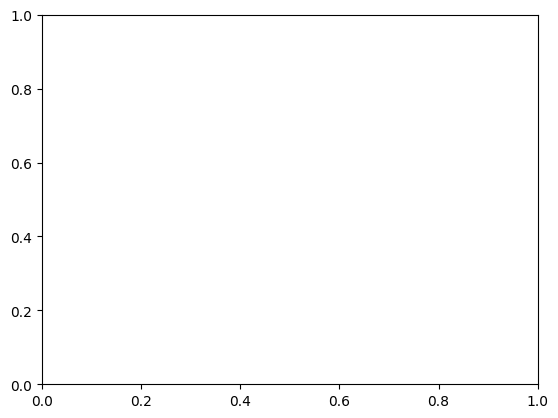

In [148]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df2["BirthDate"], df2["AccountOpened"]) # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis

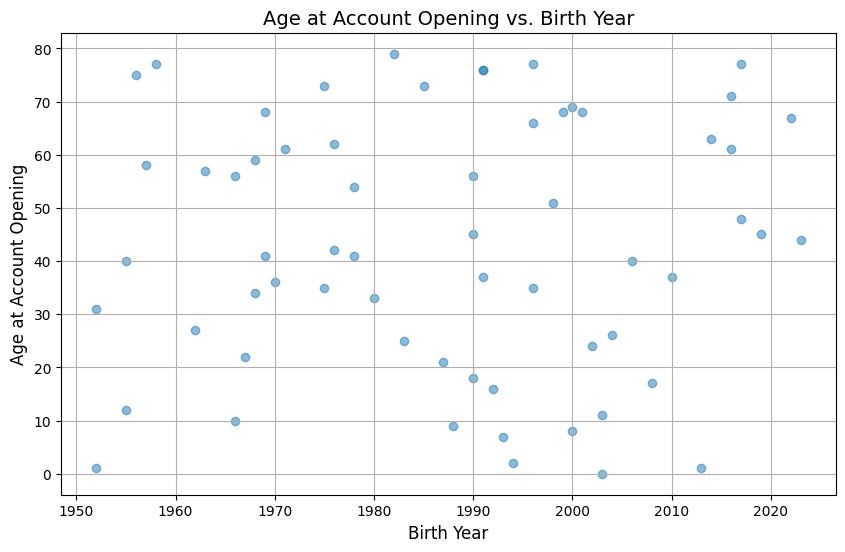

In [152]:
# Calculate the age at which each customer opened the account like we did before
df_bank_datefix["AgeAtAccountOpened"] = (df_bank_datefix["AccountOpened"] - df_bank_datefix["BirthDate"]).dt.days // 365
# Year of birth calculation
df_bank_datefix["BirthYear"] = df_bank_datefix["BirthDate"].dt.year

# Scatter plot: Birth year vs. Age at Account Opening
plt.figure(figsize=(10, 6))
plt.scatter(df_bank_datefix["BirthYear"], df_bank_datefix["AgeAtAccountOpened"], alpha=0.5)
plt.title("Age at Account Opening vs. Birth Year", fontsize=14)
plt.xlabel("Birth Year", fontsize=12)
plt.ylabel("Age at Account Opening", fontsize=12)
plt.grid(True)
plt.show()


# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

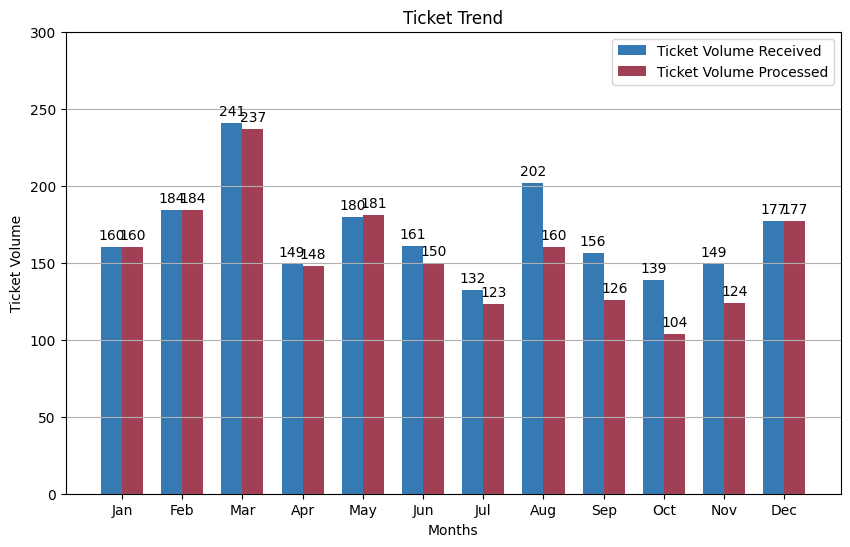

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 184, 241, 149, 180, 161, 132, 202, 156, 139, 149, 177]
processed = [160, 184, 237, 148, 181, 150, 123, 160, 126, 104, 124, 177]
y_ticks = [0, 50, 100, 150, 200, 250, 300]
bar_width = 0.35
# X-axis positions for bars
index = np.arange(len(months))


plt.figure(figsize=(10, 6))
# Create bars for received tickets (blue) and processed tickets (red)
bars_received = plt.bar(index, received, bar_width, label='Ticket Volume Received', color='#367ab3')
bars_processed = plt.bar(index + bar_width, processed, bar_width, label='Ticket Volume Processed', color='#a14055')

# Adding my own axis labels
plt.xlabel('Months')
plt.ylabel('Ticket Volume')
plt.title('Ticket Trend')

# Add the x-axis labels
plt.xticks(index + bar_width / 2, months)
# Setting the Y-axis ticks to the specific values
plt.yticks(y_ticks)

plt.legend()

# Labeling each bar with its value above it
for bar in bars_received:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, str(int(yval)), ha='center', va='bottom', fontsize=10, color='black')

for bar in bars_processed:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, str(int(yval)), ha='center', va='bottom', fontsize=10, color='black')

# Adding a grid for the lines that go across the plot
plt.grid(True, axis='y')
plt.show()


Image for reference:
![alt text](TicketTrendGraph.png)